In [1]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [2]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/개발_전처리/소프트웨어개발.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,클라우드 모니터링 솔루션 개발 데이터 수집 pipeline 개발,Java 11 버전 이상 개발 경험이 있으신 분 SpringBoot를 이용한...
1,전사적으로 발생하는 다양한 문제들을 데이터를 기반으로 해결 방법을 찾고 결과를 동...,데이터 분석 및 모델링 경력 2년 이상 또는 그에 준하는 역량을 보유하신 분 대표...
2,ESSEnergy Storage System의 주요 Software 개발 배터리 ...,정보통신컴퓨터소프트웨어 등 관련 분야 학사 이상 프로그래밍 관련 경력 2년 이상 ...
3,VitalCare의 벡엔드 시스템 설계 및 개발 Python Golang을 이용한...,Python 또는 Golang을 활용한 백엔드 개발 경험이 5년 이상 또는 그에 ...
4,제일제당 CRM 플랫폼 개발운영Data Engineer 데이터 분석 파이프라인 개...,Experience 데이터 파이프라인 구축 경험 프로세스 제안 개선문제점 분석 및 ...
...,...,...
644,IP and SoC Design Verification AI 하드웨어 프로세서 설...,System Verilog UVM C 를 이용한 IP 및 SoC Full chip...
645,1 금속 3D 프린터 OS 개발2 Depower 설비 등의 지원설비에 대한 OS 개...,학력 초대졸이상경력 경력5년우대사항병역특례영어가능자관련 석사학위 수여자3D 프린...
646,우분투1804리눅스 기반 차량용 녹화프로그램 개발 AWS S3 데이터 업로드 ...,임베디드 리눅스 개발 경력 5년 이상 CC 프로그래밍 가능자 오픈소스 포팅 유경험...
647,DC 전기차 충전기 펌웨어 개발 및 유지 보수전기차 충전 제어 담당충전기 내부 시스...,C언어 사용 가능자MCU 주변 회로 분석 가능자끈기 인내심 도전 정신 본인이 하는 ...


In [4]:
#사용할 column 선택
df = df[['주요 업무']]
df

,주요 업무
0,클라우드 모니터링 솔루션 개발 데이터 수집 pipeline 개발
1,전사적으로 발생하는 다양한 문제들을 데이터를 기반으로 해결 방법을 찾고 결과를 동...
2,ESSEnergy Storage System의 주요 Software 개발 배터리 ...
3,VitalCare의 벡엔드 시스템 설계 및 개발 Python Golang을 이용한...
4,제일제당 CRM 플랫폼 개발운영Data Engineer 데이터 분석 파이프라인 개...
...,...
644,IP and SoC Design Verification AI 하드웨어 프로세서 설...
645,1 금속 3D 프린터 OS 개발2 Depower 설비 등의 지원설비에 대한 OS 개...
646,우분투1804리눅스 기반 차량용 녹화프로그램 개발 AWS S3 데이터 업로드 ...
647,DC 전기차 충전기 펌웨어 개발 및 유지 보수전기차 충전 제어 담당충전기 내부 시스...


In [5]:
#txt로 저장
i = 'C:/Users/User/Desktop/개발_전처리/소프트웨어개발(주요업무).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [6]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'주요 업무\n 클라우드 모니터링 솔루션 개발   데이터 수집 pipeline 개발\n 전사적으로 발생하는 다양한 문제들을 데이터를 기반으로 해결 방법을 찾고 결과를 동료에게 효과적으로 전달 맞춤형 건강관리 상품 추천 등 다양한 헬스케어 앱 서비스를 위한 알고리즘 개발 및 고도화   eg 추천 모델 랭킹 모델 최적화 생성형 모델 추론예측 모델 등 클라우드 환경에서 데이터를 수집 및 가공하고 모델을 구축 최신 AIMLDL 기술 연구 동향을 파악하여 비즈니스에 접목\n ESSEnergy Storage System의 주요 Software 개발 배터리 전력변환장치 제어 및 주변 기타 장치 모니터링 실시간 전력 데이터 수집 및 분석\n VitalCare의 벡엔드 시스템 설계 및 개발 Python Golang을 이용한 서비스 구축 및 유지보수 MySQL MongoDB 와의 통합 및 데이터 처리 병원 내의 의료 데이터를 안전하게 처리하고 저장하기 위한 기술적인 솔루션 제공 성능 최적화 및 보안 이슈에 대한 지속적인 모니터링과 개선 테스트 코드 작성 및 유지보수 테스트 자동화를 통한 서비스와 코드 품질 보장\n 제일제당 CRM 플랫폼 개발운영Data Engineer 데이터 분석 파이프라인 개발 및 운영데이터 수집 및 분석 클라우드 기반 데이터 처리 및 최적화 관리\n사용기술Java C C Python 산업용 장비 데이터베이스 구축 및 서버관리데이터 운영\n삼성전기 수원 프로젝트 MES 프로젝트로 제품이 생산되는 일련의 공정들에 대한 UI단을 개발MSS 프로젝트로 설비와 MES 간의 Dashboard를 개발하는 역할로써 UI와 DB를 모두 컨트롤하는 업무면접 후 상기 적합도에 따라 포지션 배치\n iOS APP 서비스의 분석 및 개발 테스트 및 지속적인 최적화를 담당합니다 UX 디자이너와 협업하여 화면 디자인 및 프로세스에 대해 논의합니다 APP 개발 워크플로를 연구하고 개선합니다\n 광고 SDK 개발 및 유지보수 인하우스 서비스 iOS 개발\n UXP에서 담당하는 뱅크샐러드

In [7]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['주요',
 '업무',
 '클라우드',
 '모니터링',
 '솔루션',
 '개발',
 '데이터',
 '수집',
 '개발',
 '사적',
 '발생',
 '문제',
 '데이터',
 '기반',
 '해결',
 '방법',
 '결과',
 '동료',
 '효과',
 '전달',
 '맞춤',
 '건강',
 '관리',
 '상품',
 '추천',
 '등',
 '헬',
 '스케',
 '앱',
 '서비스',
 '위',
 '알고리즘',
 '개발',
 '및',
 '고도화',
 '추천',
 '모델',
 '랭킹',
 '모델',
 '최적화',
 '생',
 '성형',
 '모델',
 '추론',
 '예측',
 '모델',
 '등',
 '클라우드',
 '환경',
 '데이터',
 '수집',
 '및',
 '가공',
 '모델',
 '구축',
 '최신',
 '기술',
 '연구',
 '동향',
 '파악',
 '비즈니스',
 '접목',
 '의',
 '주요',
 '개발',
 '배터리',
 '전력',
 '변환',
 '장치',
 '제어',
 '및',
 '주변',
 '기타',
 '장치',
 '모니터링',
 '실시간',
 '전력',
 '데이터',
 '수집',
 '및',
 '분석',
 '의',
 '벡엔드',
 '시스템',
 '설계',
 '및',
 '개발',
 '이용',
 '서비스',
 '구축',
 '및',
 '유지',
 '보수',
 '통합',
 '및',
 '데이터',
 '처리',
 '병원',
 '내의',
 '의료',
 '데이터',
 '처리',
 '저장',
 '위',
 '기술',
 '솔루션',
 '제공',
 '성능',
 '최적화',
 '및',
 '보안',
 '이슈',
 '대한',
 '지속',
 '모니터링',
 '개선',
 '테스트',
 '코드',
 '작성',
 '및',
 '유지',
 '보수',
 '테스트',
 '자동화',
 '통한',
 '서비스',
 '코드',
 '품질',
 '보장',
 '제일제당',
 '플랫폼',
 '개발',
 '운영',
 '데이터',
 '분석',
 '파이프라인',
 '개발',
 '및',
 '운영',
 '데이

In [8]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

23401
1562


FreqDist({'개발': 1467, '및': 825, '서비스': 400, '시스템': 324, '팀': 314, '개발자': 305, '설계': 283, '운영': 268, '기반': 242, '수': 232, ...})

In [9]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [13]:
stop_words = [
   '강남','서비스','문제', '환경','기술','지식','개발','사용','이해','기반','필수','가능','우대','경험','관심','활용','관련','능력','이해도','대한','보유','이상','실행','디지털','제안','플루','인','제작','수립','신규','업무','사','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['주요',
 '클라우드',
 '모니터링',
 '솔루션',
 '데이터',
 '수집',
 '사적',
 '발생',
 '데이터',
 '방법',
 '결과',
 '동료',
 '효과',
 '전달',
 '맞춤',
 '건강',
 '관리',
 '상품',
 '추천',
 '헬',
 '스케',
 '앱',
 '알고리즘',
 '고도화',
 '추천',
 '모델',
 '랭킹',
 '모델',
 '최적화',
 '생',
 '성형',
 '모델',
 '추론',
 '예측',
 '모델',
 '클라우드',
 '데이터',
 '수집',
 '가공',
 '모델',
 '구축',
 '최신',
 '연구',
 '동향',
 '파악',
 '비즈니스',
 '접목',
 '의',
 '주요',
 '배터리',
 '전력',
 '변환',
 '장치',
 '제어',
 '주변',
 '기타',
 '장치',
 '모니터링',
 '실시간',
 '전력',
 '데이터',
 '수집',
 '분석',
 '의',
 '벡엔드',
 '시스템',
 '설계',
 '이용',
 '구축',
 '유지',
 '보수',
 '통합',
 '데이터',
 '처리',
 '병원',
 '내의',
 '의료',
 '데이터',
 '처리',
 '저장',
 '솔루션',
 '제공',
 '성능',
 '최적화',
 '보안',
 '이슈',
 '지속',
 '모니터링',
 '개선',
 '테스트',
 '코드',
 '작성',
 '유지',
 '보수',
 '테스트',
 '자동화',
 '통한',
 '코드',
 '품질',
 '보장',
 '제일제당',
 '플랫폼',
 '운영',
 '데이터',
 '분석',
 '파이프라인',
 '운영',
 '데이터',
 '수집',
 '분석',
 '클라우드',
 '데이터',
 '처리',
 '최적화',
 '관리',
 '산업',
 '용',
 '장비',
 '데이터베이스',
 '구축',
 '서버',
 '관리',
 '데이터',
 '운영',
 '삼성',
 '전기',
 '수원',
 '프로젝트',
 '프로젝트',
 '제품',
 '생산',
 '일련',
 '공정',
 '단',
 '프로젝트',
 '설비',


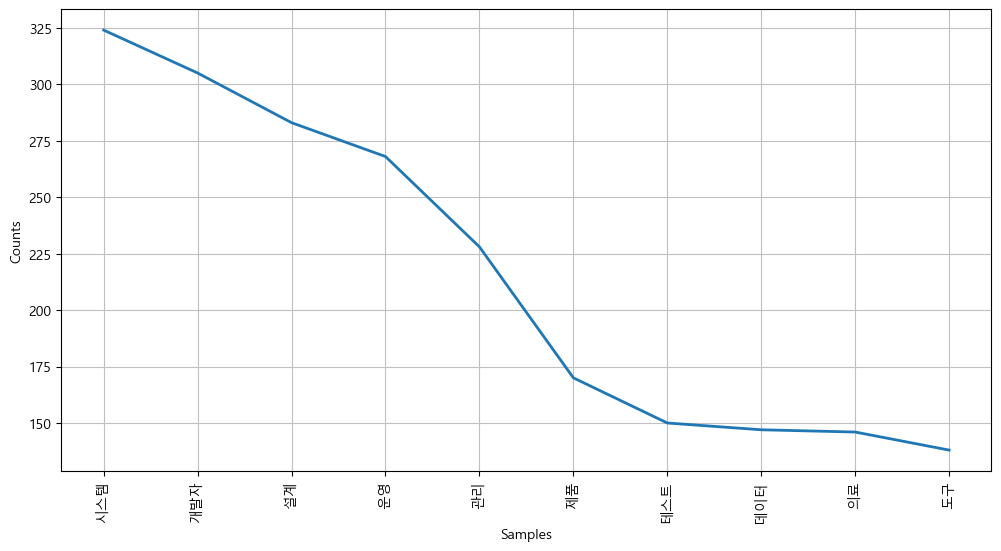

In [14]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

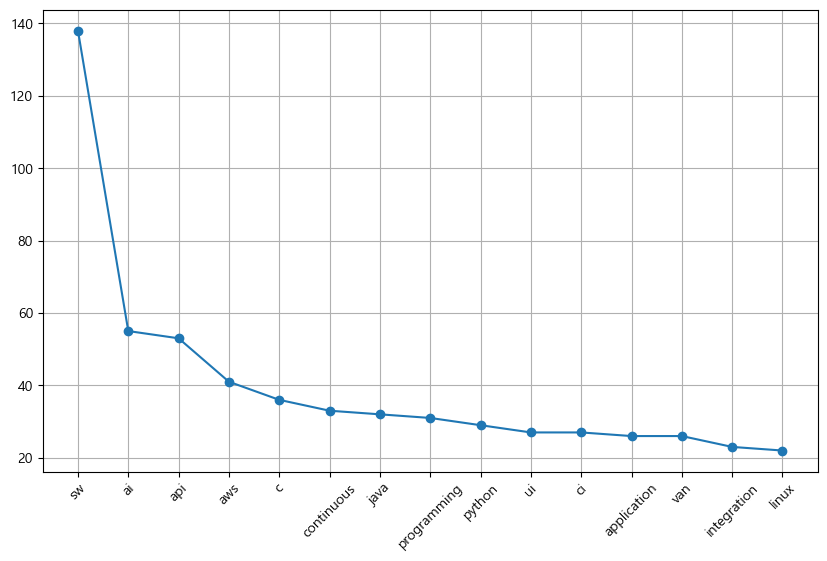

In [16]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['restful','main','continous']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)